In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 이용자
plt.rcParams['font.family'] = 'AppleGothic' # Mac 이용자
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 아래 데이터로 대체

# 제주 날씨 데이터 불러오기
# df_weather_jeju = pd.read_csv("dataset/weather_jeju.csv")

# df_weather_jeju.head()

# df_weather_jeju = df_weather_jeju[::4]
# print(df_weather_jeju.head())
# print(df_weather_jeju.info())
# print(df_weather_jeju.describe())
# print(df_weather_jeju.tail())

# print(df_weather_jeju["합계 일사량"])

# df_weather_jeju.hist(figsize=(16,12), bins=10)


In [4]:
# 전력 수급 현황 데이터 불러오기
# 데이터 소스
# https://www.data.go.kr/data/15125113/fileData.do
# UTF-8 인코딩 불가
df_upper = pd.read_csv("dataset/제주전력수급현황(18년~23년)/계통수요.csv", encoding="cp949") # utf-8 X
df_bottom = pd.read_csv("dataset/제주전력수급현황(23년~25년)/계통수요.csv", encoding="cp949") # utf-8 X

print(f"18년~23년 데이터 수: {len(df_upper)}")
print(f"23년~25년 데이터 수: {len(df_bottom)}")

print(df_upper.tail())
print(df_bottom.head())

df_demand = pd.concat([df_upper, df_bottom], axis=0)
print(len(df_demand))

df_demand["전력수요총합"] = df_demand.iloc[:, 1:].sum(axis=1)
print(df_demand.info())
# print(df_demand.head())


df_demand_sum = df_demand[["날짜", "전력수요총합"]]
print(df_demand_sum.head())

18년~23년 데이터 수: 2069
23년~25년 데이터 수: 608
              날짜     1시     2시     3시  ...    21시    22시    23시    24시
2064  2023-08-27  685.5  643.5  610.3  ...  932.1  883.2  828.6  778.6
2065  2023-08-28  715.7  676.4  648.6  ...  973.9  918.7  861.7  802.0
2066  2023-08-29  739.2  694.8  661.9  ...  959.0  902.9  847.5  793.0
2067  2023-08-30  730.5  683.6  655.0  ...  853.9  807.7  764.0  716.4
2068  2023-08-31  671.3  628.1  600.5  ...  865.0  819.4  775.1  733.8

[5 rows x 25 columns]
           날짜     1시     2시     3시     4시  ...    20시    21시    22시    23시    24시
0  2023-09-01  676.8  636.8  608.0  588.1  ...  897.3  880.4  836.7  796.9  757.2
1  2023-09-02  704.3  661.5  632.1  606.1  ...  913.7  890.9  844.8  798.9  754.8
2  2023-09-03  704.9  659.9  630.4  611.2  ...  936.1  905.5  854.0  800.8  750.3
3  2023-09-04  690.8  644.8  619.2  601.1  ...  975.9  938.1  879.8  826.8  773.9
4  2023-09-05  711.8  666.9  637.3  617.4  ...  931.4  891.8  840.7  794.7  747.7

[5 rows x 25 column

# 전처리

In [5]:
# 날씨 데이터 2015년~2025년
df_temp = pd.read_csv("dataset/기온데이터.csv", encoding="cp949")
df_sun = pd.read_csv("dataset/일조량데이터.csv", encoding="cp949")
df_wind = pd.read_csv("dataset/풍속데이터.csv", encoding="cp949")
df_rain = pd.read_csv("dataset/강수량데이터.csv", encoding='cp949')
df_hum = pd.read_csv("dataset/습도데이터.csv", encoding='utf-8')

# 풍향풍속데이터 전처리
# 필요없는 컬럼 제거
df_wind = df_wind.iloc[:, :4]
df_hum = df_hum.iloc[:, 2:4]

# 강수량 데이터 결측치 0으로 채워놓기
df_rain.fillna(0, inplace=True)

# 각 데이터 프레임 컬럼명 변경
df_temp.columns = ['일시', '평균기온', '최고기온', '최고기온시각', '최저기온', '최저기온시각일교차']
df_sun.columns = ['일시', '일조합', '일조율', '일사합']
df_wind.columns = ['일시', '평균풍속', '최대풍속', '최대풍속풍향']
df_rain.columns = ['일시', '강수량']
df_hum.columns = ["일시", "평균습도"]

# 일시 컬럼 데이터
df_sun = df_sun.iloc[:, 1:]
df_wind = df_wind.iloc[:, 1:]
df_rain = df_rain.iloc[:, 1:]
df_hum = df_hum.iloc[:, 1:]

# 합치기
df_weather = pd.concat([df_temp, df_sun, df_wind, df_rain, df_hum], axis=1)
print(df_weather)

              일시  평균기온  최고기온  최고기온시각   최저기온  ...  평균풍속  최대풍속  최대풍속풍향  강수량  평균습도
0     2015-01-01   3.3   5.4     1.7   5:08  ...   8.3  12.9     320  4.2  69.9
1     2015-01-02   6.1   8.5     3.9  22:01  ...   6.3   9.7     290  0.0  53.1
2     2015-01-03   6.8   9.6     3.5   3:28  ...   2.1   3.7     290  0.0  61.3
3     2015-01-04  11.5  15.0     7.7   1:05  ...   2.8   4.3     250  0.0  64.8
4     2015-01-05  12.9  17.5     6.8   2:22  ...   2.2   7.2     200  0.7  59.9
...          ...   ...   ...     ...    ...  ...   ...   ...     ...  ...   ...
3857  2025-07-24  29.0  31.9    26.0   5:02  ...   3.2   6.5      50  0.0  66.0
3858  2025-07-25  28.8  31.9    26.9   1:28  ...   3.9   7.0      70  0.0  78.0
3859  2025-07-26  28.8  30.8    27.0   6:06  ...   4.3   7.1      70  0.0  80.6
3860  2025-07-27  28.3  30.8    26.7   4:51  ...   4.5   7.3      50  0.0  80.9
3861  2025-07-28  29.3  33.5    26.3   0:39  ...   3.6   7.2      50  0.0  68.5

[3862 rows x 14 columns]


In [6]:
# 일시 데이터 년, 월, 일 분개


In [7]:
# 날씨 데이터 + 전력 수요
df = pd.merge(df_weather, df_demand_sum, left_on="일시", right_on="날짜", how='inner')
df.drop('날짜', axis=1, inplace=True)

# 일시 데이터 연, 월, 일 분개
df["일시"] = pd.to_datetime(df["일시"])
df["연"] = df["일시"].dt.year
df["월"] = df["일시"].dt.month
df["일"] = df["일시"].dt.day

print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
null_rows_index = df[df.isnull().any(axis=1)].index
print(null_rows_index)

          일시  평균기온  최고기온  최고기온시각   최저기온  ...  평균습도   전력수요총합     연  월  일
0 2018-01-01   6.4   8.8     4.0  23:52  ...  53.4  15744.3  2018  1  1
1 2018-01-02   7.0  10.1     3.0   4:31  ...  53.5  16917.8  2018  1  2
2 2018-01-03   5.0   8.4     3.5  21:28  ...  60.3  17103.2  2018  1  3
3 2018-01-04   3.9   4.6     2.4  23:41  ...  70.0  17719.1  2018  1  4
4 2018-01-05   5.1   6.5     1.9   0:54  ...  70.5  17964.2  2018  1  5

[5 rows x 18 columns]
             일시  평균기온  최고기온  최고기온시각   최저기온  ...  평균습도   전력수요총합     연  월   일
2672 2025-04-26  15.7  20.2    10.6   5:36  ...  31.9  14622.0  2025  4  26
2673 2025-04-27  16.6  21.0    12.8   3:41  ...  53.0  14679.0  2025  4  27
2674 2025-04-28  15.5  19.5    12.2  23:40  ...  67.3  14864.9  2025  4  28
2675 2025-04-29  14.5  17.9     9.7   6:15  ...  52.8  15227.1  2025  4  29
2676 2025-04-30  16.5  20.5    12.3   5:35  ...  57.0  15083.5  2025  4  30

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 

# 데이터 시각화

<Axes: >

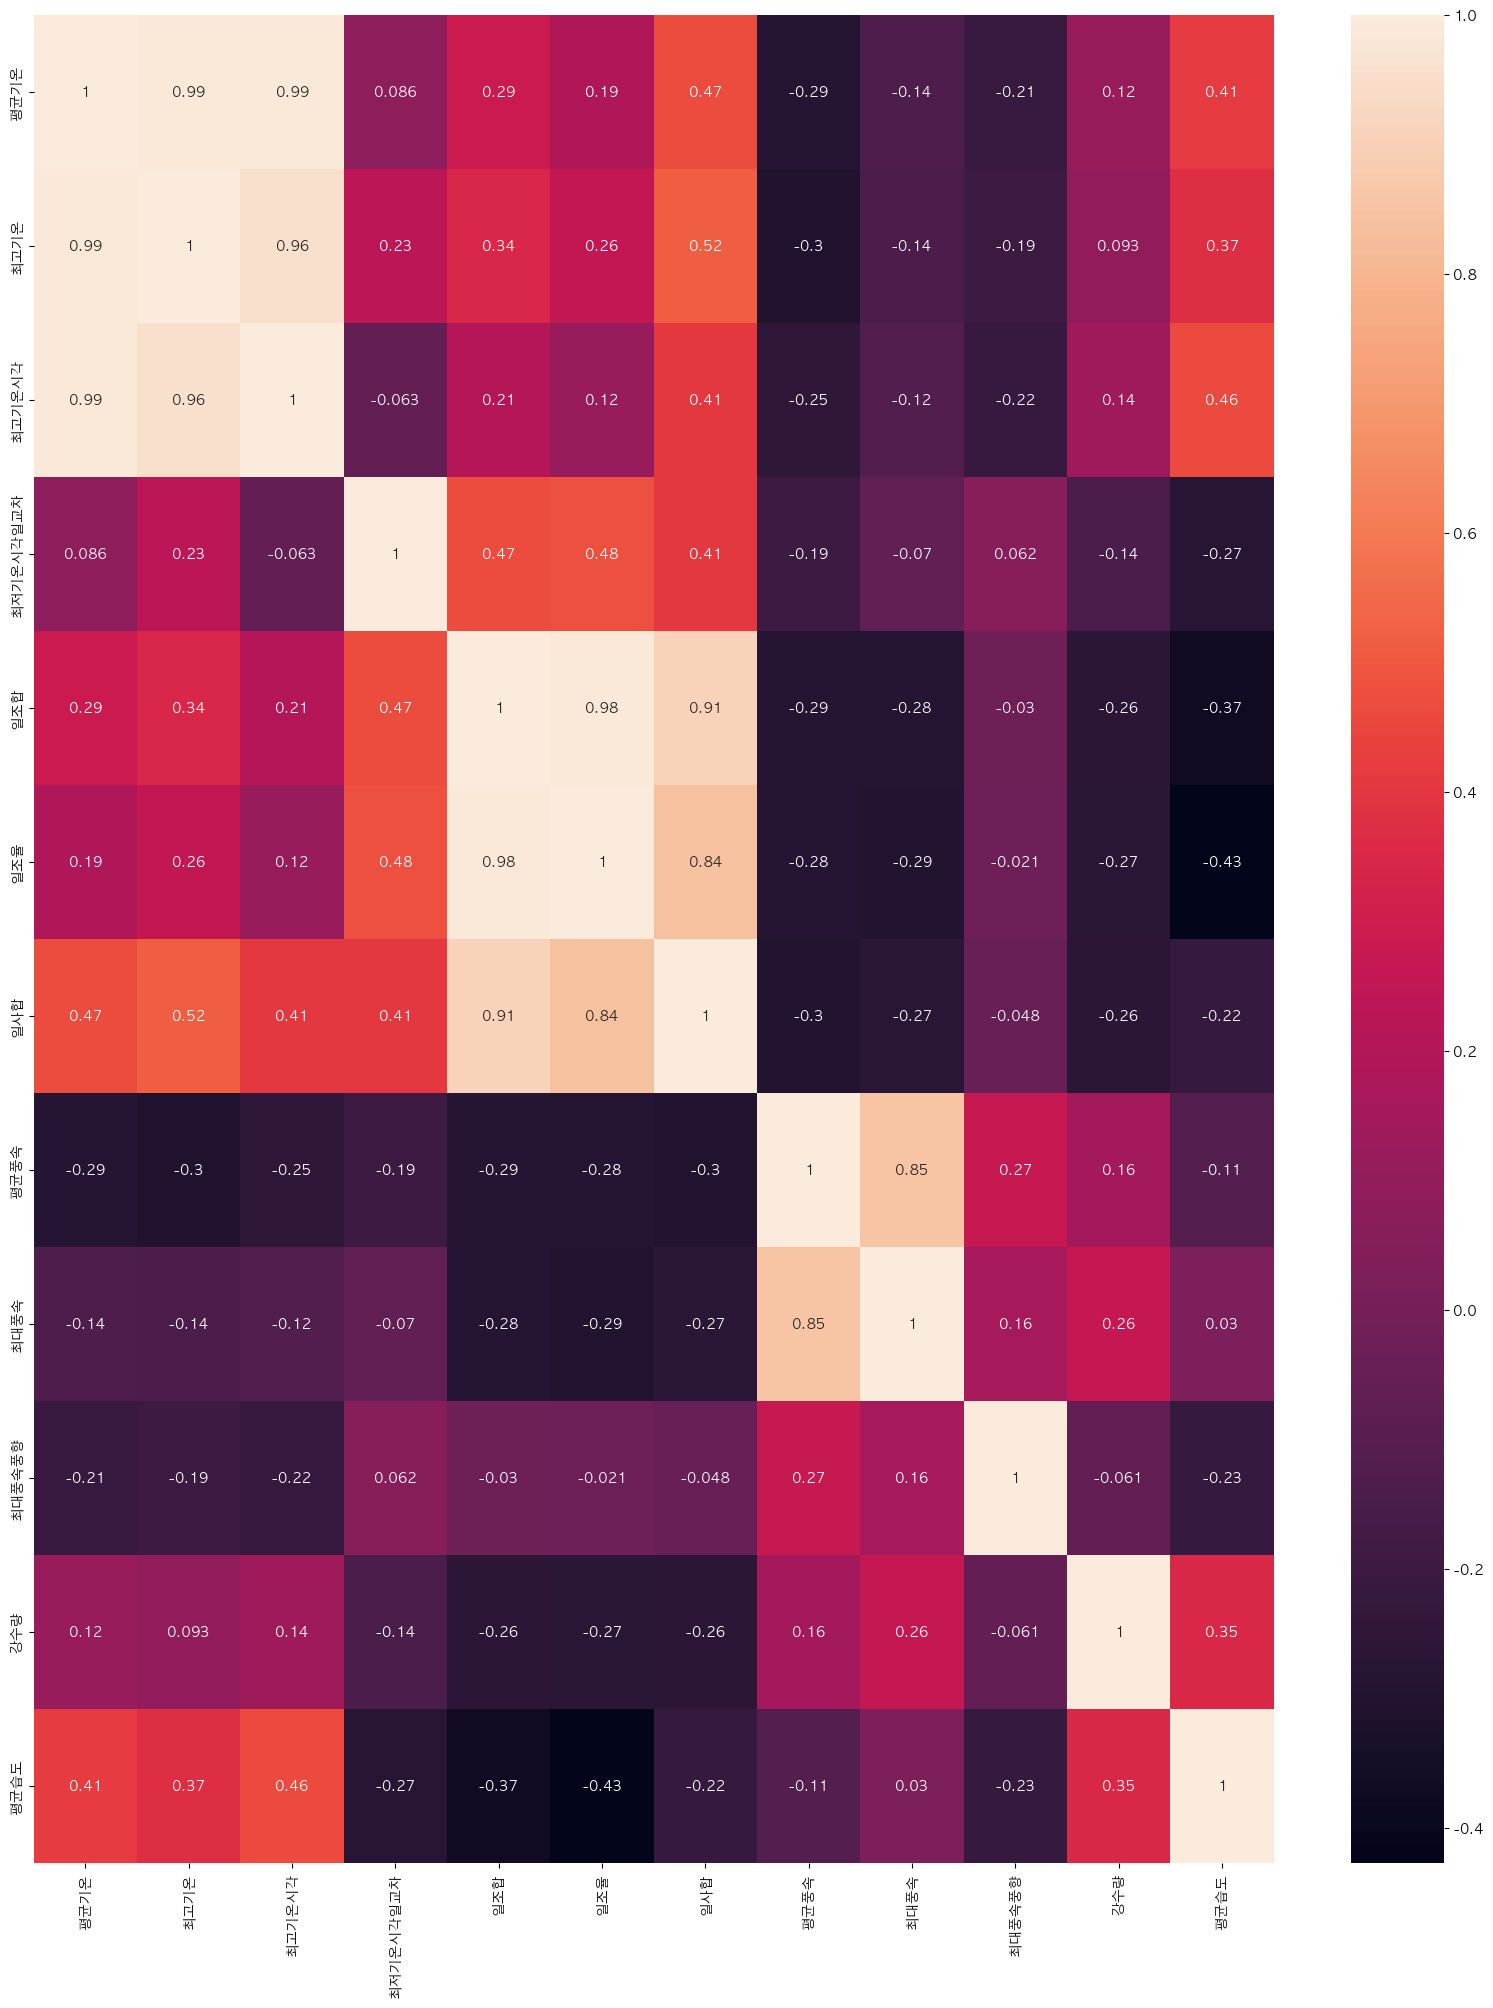

In [8]:
# 성분 간 관계 분석
plt.figure(figsize=(20,24))
sns.heatmap(df.iloc[:, :-4].corr(numeric_only=True), annot=True)

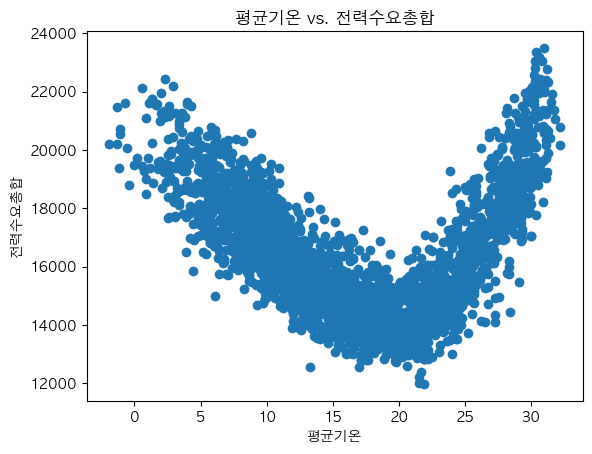

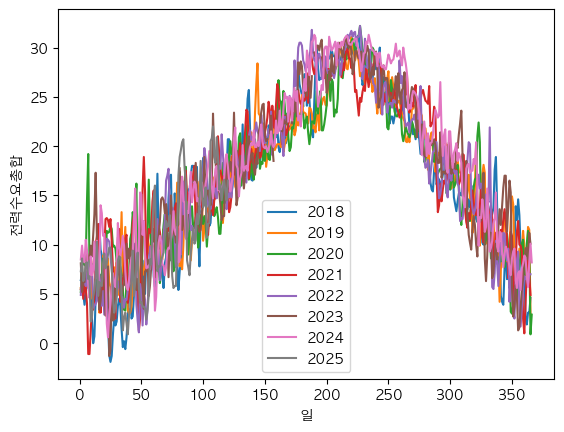

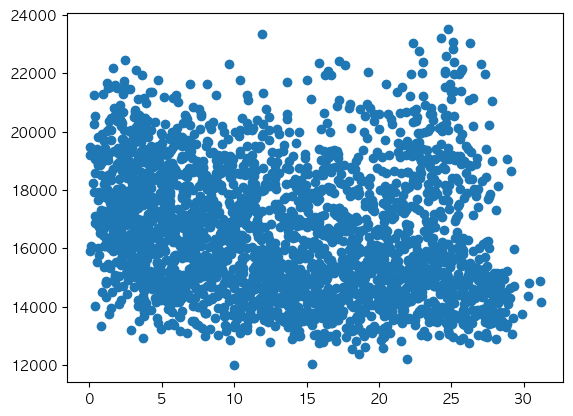

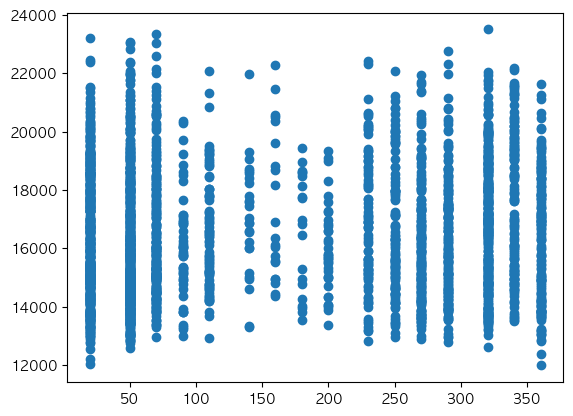

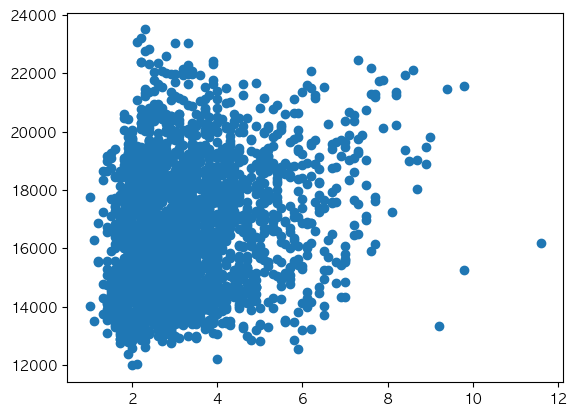

In [9]:
# 평균기온 vs. 전력수요총합 산점도
plt.scatter(df["평균기온"], df["전력수요총합"])
plt.xlabel("평균기온")
plt.ylabel("전력수요총합")
plt.title("평균기온 vs. 전력수요총합")
plt.show()

df_2018 = df.loc[(df["연"] >= 2018) & (df["연"] < 2019), ]

# 연도별 일자 평균기온 데이터
fig, ax = plt.subplots()
for year in range(2018, 2026):
    df_yearly = df.loc[(df["연"] >= year) & (df["연"] < year+1), ]
    ax.plot(df_yearly["일시"].dt.dayofyear, df_yearly["평균기온"], label=f"{year}")
    ax.legend()
    
plt.xlabel("일")
plt.ylabel("전력수요총합")
plt.show()

# 합계 일사량 vs. 전력수요총합
plt.scatter(df["일사합"], df["전력수요총합"])
plt.show()

# 최대풍속풍향 vs. 전력수요총합
plt.scatter(df["최대풍속풍향"], df["전력수요총합"])
plt.show()

# 최대풍속 vs. 전력수요총합
plt.scatter(df["평균풍속"], df["전력수요총합"])
plt.show()

<Axes: >

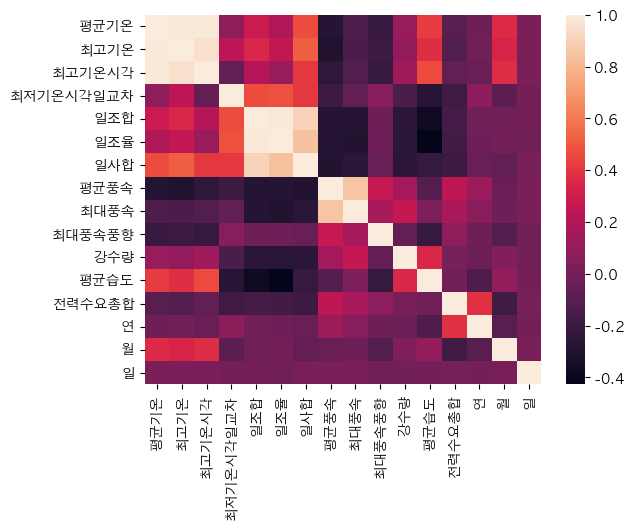

In [10]:
# 성분 간 관계 분석
sns.heatmap(df.corr(numeric_only=True))

# 예측 모델

## 선형 회귀 머신러닝

Index([], dtype='int64')
R-squared: 0.6949


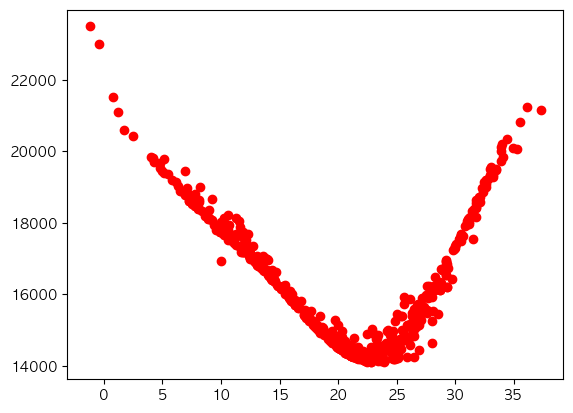

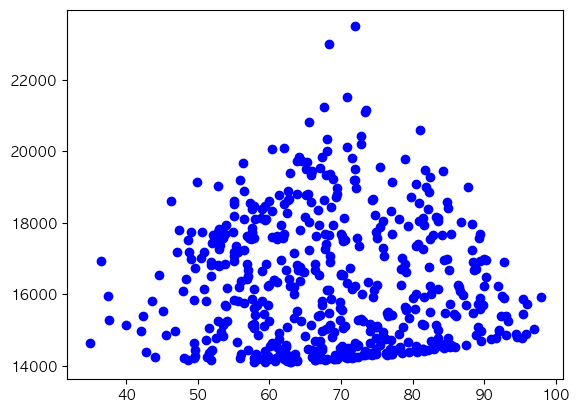

MSE: 0.6949


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

print(df[df[["최고기온", "평균습도"]].isnull().any(axis=1)].index)
df = df.dropna()

X = df[["최고기온", "평균습도"]].values.reshape(-1,2)

y = df["전력수요총합"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
model.fit(X_train, y_train)

r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], y_pred, color="red")
plt.show()
plt.scatter(X_test[:, 1], y_pred, color="blue")
plt.show()

score = mean_squared_error(y_test, y_pred)
print(f"MSE: {r_squared:.4f}")